In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the dataset
df=pd.read_csv("Medical_Cost_Insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.shape

(1338, 7)

In [4]:
print("The dataset is having",df.shape[0],"rows.")
print("The dataset is having",df.shape[1],"columns.")

The dataset is having 1338 rows.
The dataset is having 7 columns.


In [5]:
print("The minimum age in dataset is",df['age'].min())
print("The maximum age in dataset is",df['age'].max())

The minimum age in dataset is 18
The maximum age in dataset is 64


In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

As we can see there are certain columns in the dataset which are object in nature, we have to encode them into numerical form to proceed further with the regression model.

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values in the dataset

<AxesSubplot:>

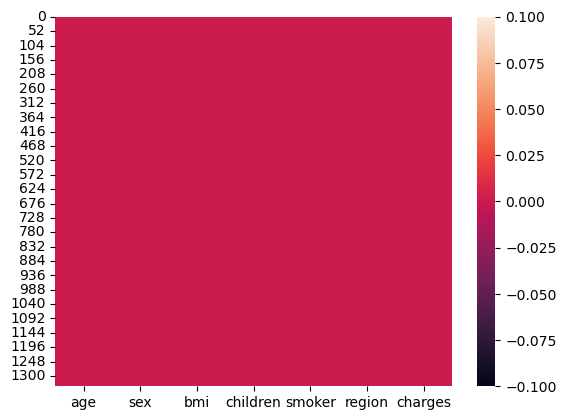

In [8]:
#visulaizing the null values in the dataset
sns.heatmap(df.isnull())

In [9]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [10]:
df.nunique().to_frame("No. of unique columns")

,No. of unique columns
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


Here we can see there are no void spaces in the dataset.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
#checking duplicate rows
print("The total number of duplicate rows are:",df.duplicated().sum())

The total number of duplicate rows are: 1


In [13]:
#Dropping the duplicate data
df.drop(df.duplicated().sum(),inplace=True)

# Description

In [14]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222887,30.661073,1.094989,13279.057172
std,14.043228,6.099876,1.205941,12110.421289
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Here we can see there are some outliers present in the dataset by comparing 75% and max value

# Visualization

In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Univariate Analysis

<AxesSubplot:xlabel='age', ylabel='Density'>

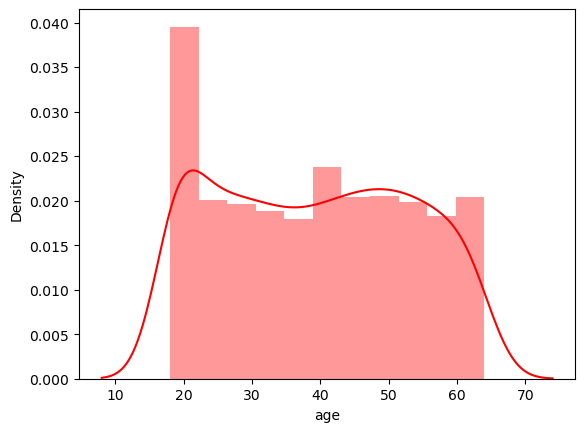

In [16]:
sns.distplot(df['age'],color='red')

male      675
female    662
Name: sex, dtype: int64


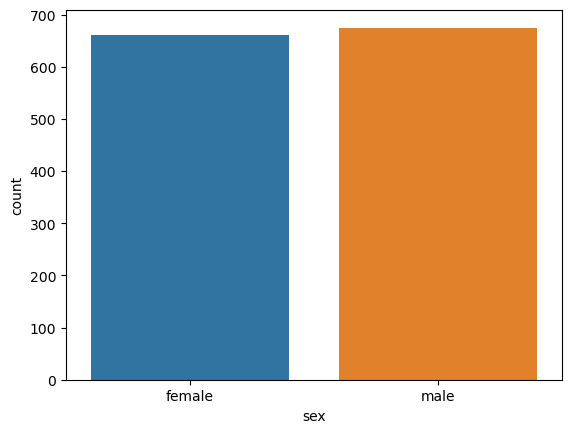

In [17]:
sns.countplot(x='sex',data=df)
print(df['sex'].value_counts())

<AxesSubplot:xlabel='bmi', ylabel='Density'>

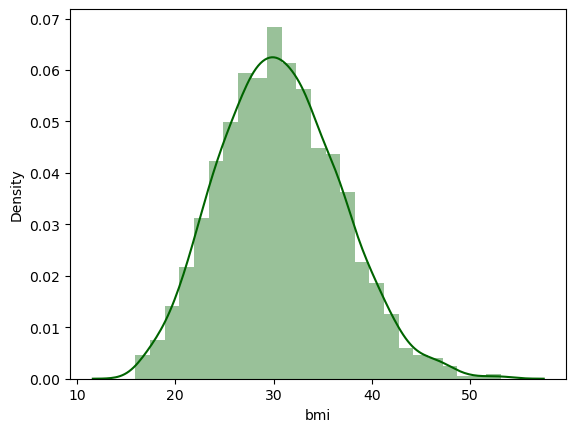

In [18]:
sns.distplot(df['bmi'],color='darkgreen')

0    574
1    323
2    240
3    157
4     25
5     18
Name: children, dtype: int64


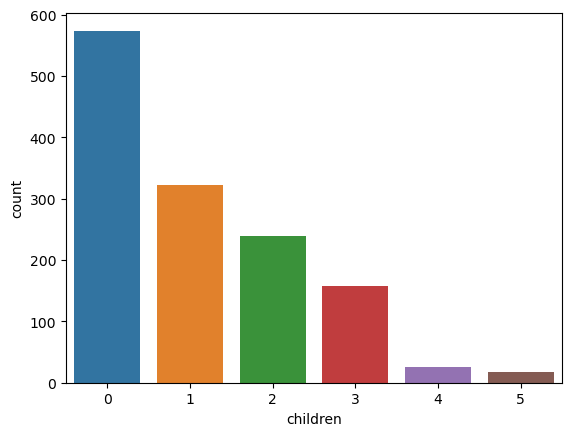

In [19]:
sns.countplot(x='children',data=df)
print(df['children'].value_counts())

no     1063
yes     274
Name: smoker, dtype: int64


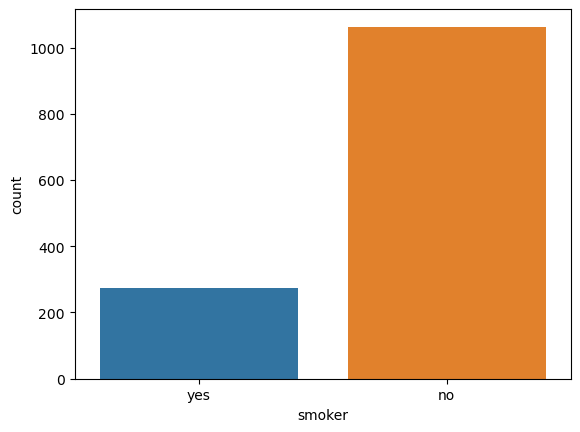

In [20]:
sns.countplot(data=df,x='smoker')
print(df['smoker'].value_counts())

In [21]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

southeast    363
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


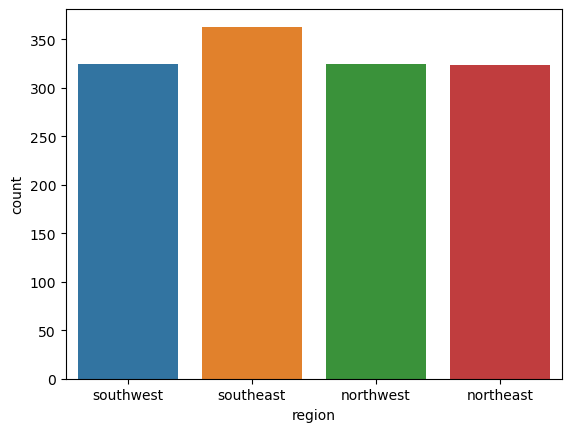

In [22]:
sns.countplot(data=df,x='region')
print(df['region'].value_counts())

<AxesSubplot:xlabel='charges', ylabel='Density'>

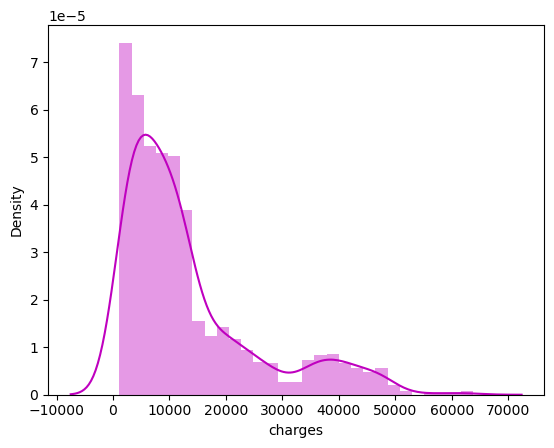

In [23]:
sns.distplot(df['charges'],color='m')

Here in the charges column we can see there is skewness but as it is the target variable we can't perform any such operation on this column

# Bi-variate Analysis

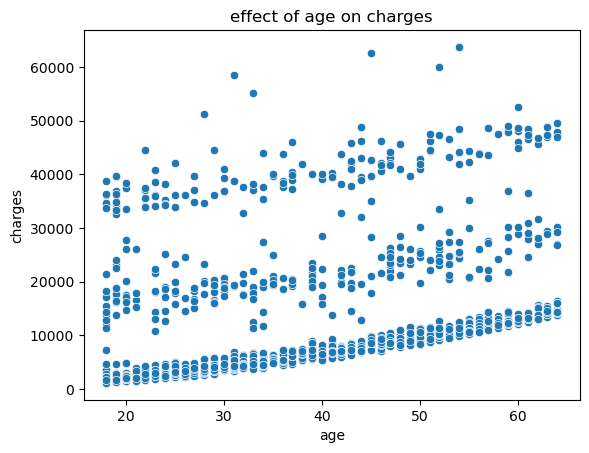

In [24]:
plt.title("effect of age on charges")
sns.scatterplot(x='age',y='charges',data=df,palette='Ascent')
plt.show()

<AxesSubplot:title={'center':'Effect of BMI on charges'}, xlabel='bmi', ylabel='charges'>

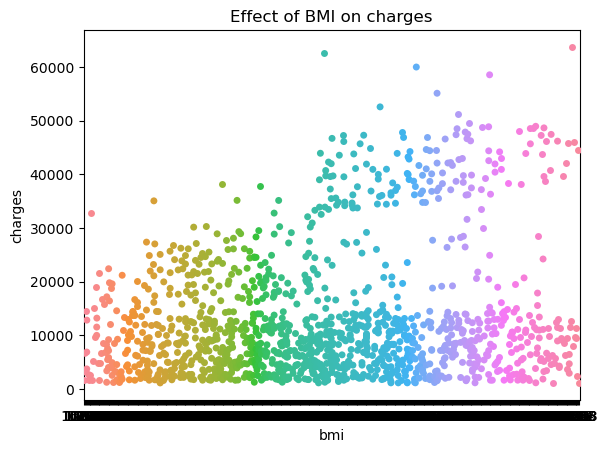

In [25]:
plt.title("Effect of BMI on charges")
sns.stripplot(x='bmi',y='charges',data=df)

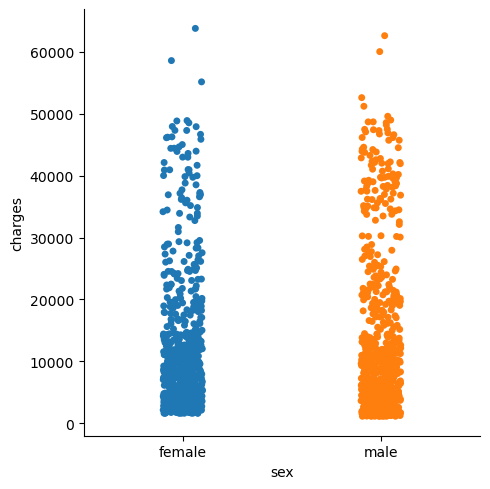

In [26]:
sns.catplot(x='sex',y='charges',data=df)

In [27]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

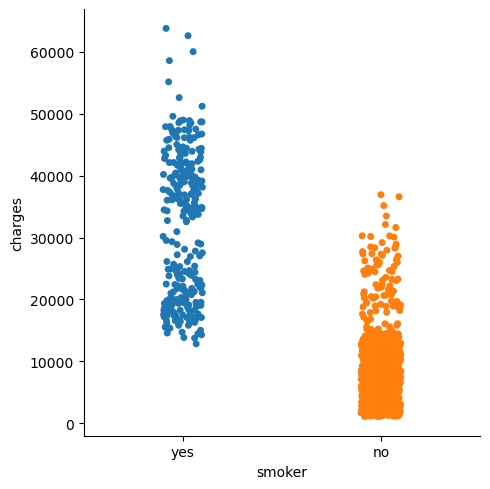

In [28]:
sns.catplot(x='smoker',y='charges',data=df)

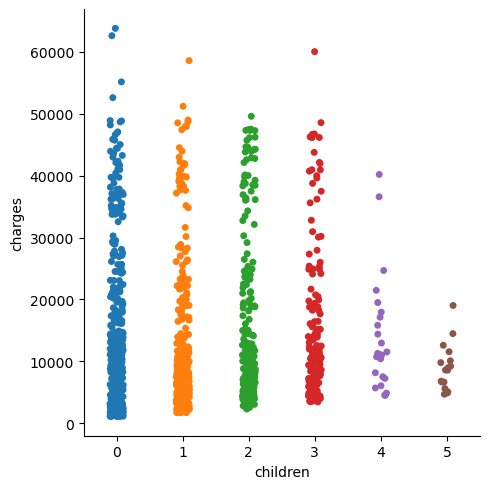

In [29]:
sns.catplot(x='children',y='charges',data=df)

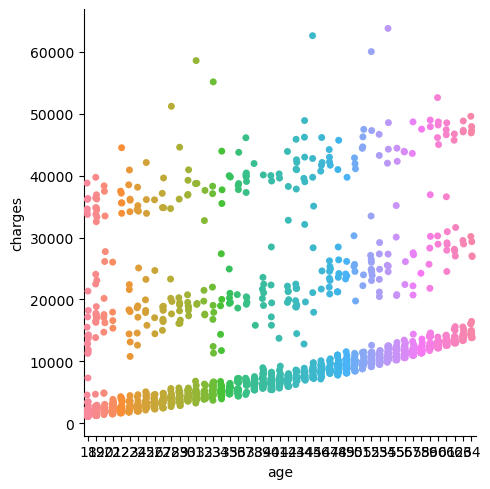

In [30]:
sns.catplot(x='age',y='charges',data=df)

# Multi-Variate Analysis

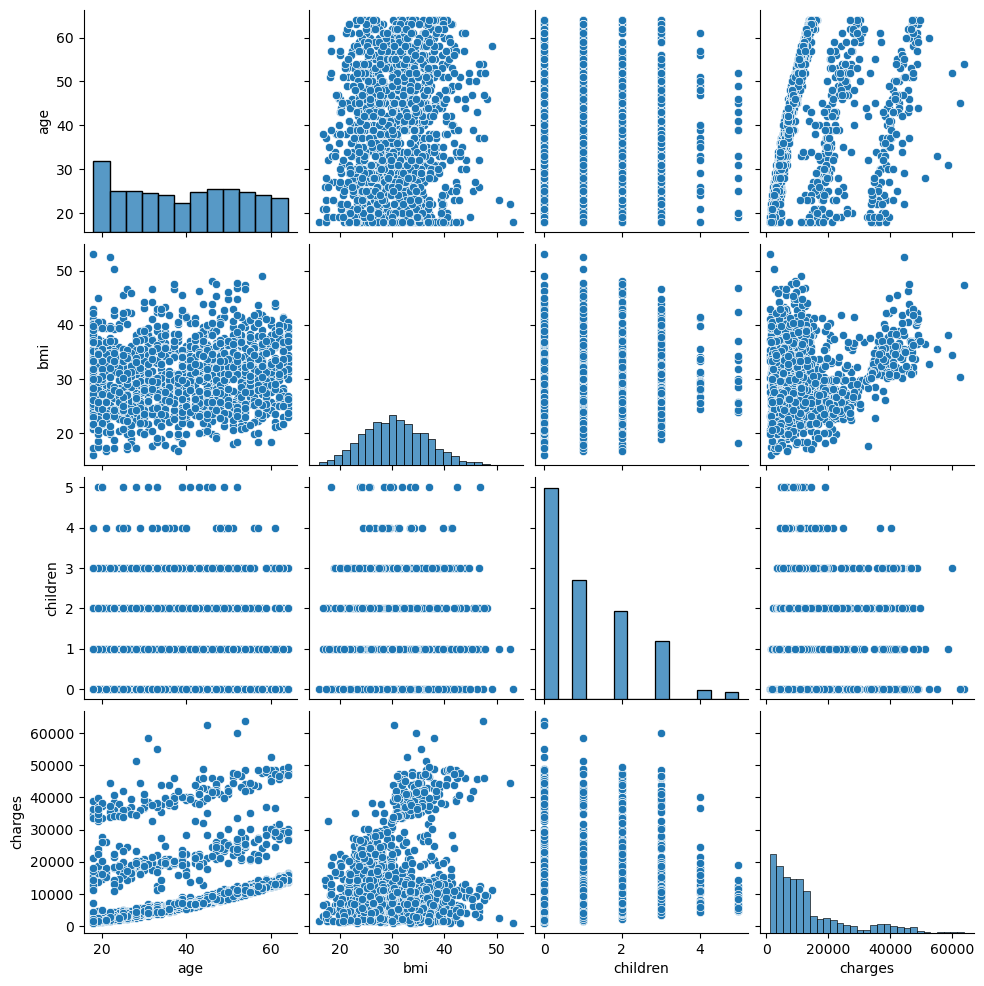

In [31]:
sns.pairplot(data=df,palette='Dark2')

# Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [34]:
le=LabelEncoder()
list=['sex','smoker','region']
for i in list:
    df[i]=le.fit_transform(df[i])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160


Now our whole dataset is converted into numerical form

# Outliers Detection

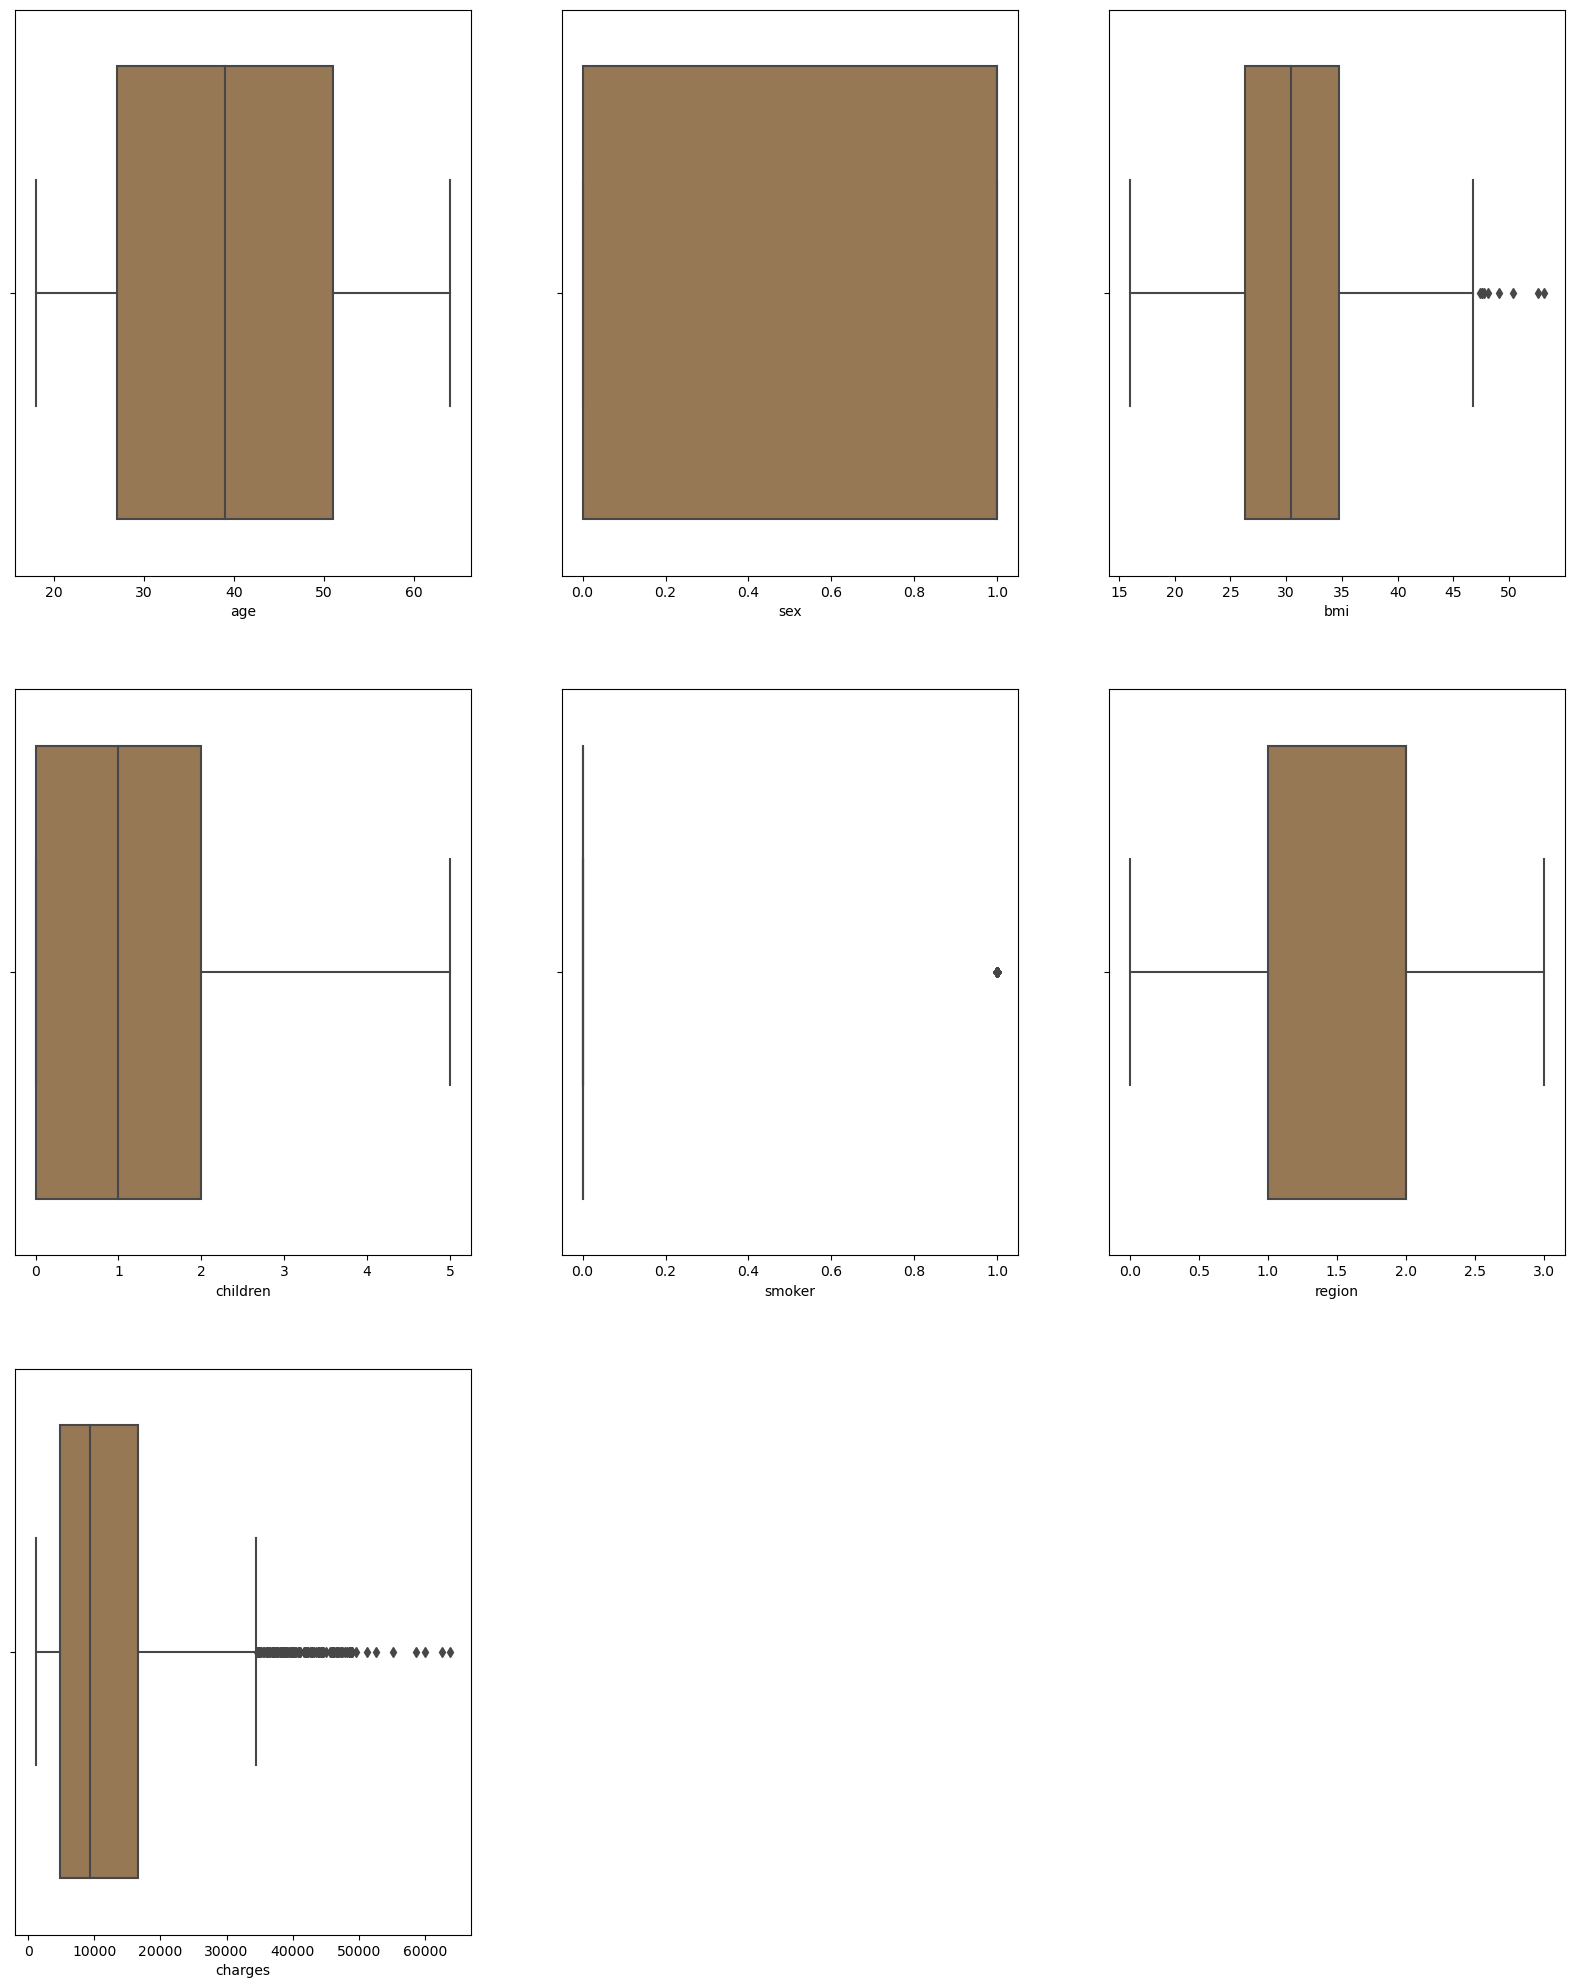

In [35]:
#Lets visulaize outliers using the boxplot
plt.figure (figsize=(20,25))
plt.no=1
for i in df:
    if plt.no <=7:
        plt.subplot(3,3,plt.no)
        sns.boxplot(df[i],palette='cubehelix')
    plt.no+=1
plt.show()

As we can see only the BMI column is having little outlier, lets remove them to proceed further.

# Removing Outliers

In [36]:
from scipy.stats import zscore

In [37]:
outlier=df['bmi']

In [38]:
z=np.abs(zscore(outlier))
z

0       0.452814
2       0.383582
3       1.304789
4       0.292094
5       0.807052
          ...   
1333    0.050664
1334    0.206463
1335    1.014978
1336    0.797212
1337    0.260935
Name: bmi, Length: 1337, dtype: float64

In [39]:
threshold=3
print(np.where(z>3))

(array([ 115,  846, 1046, 1316], dtype=int64),)


In [40]:
df_new=df[(z<3)]
df_new.shape

(1333, 7)

In [41]:
print("Old Data Frame =",df.shape[0])
print("New Data Frame =",df_new.shape[0])
print("Data Loss Percentage =",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Old Data Frame = 1337
New Data Frame = 1333
Data Loss Percentage = 0.2991772625280479


As we can see the percentage of data loss is very less so we can continue with the new dataset obtained after removing outliers.

In [42]:
df=df_new
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# Checking Skewness

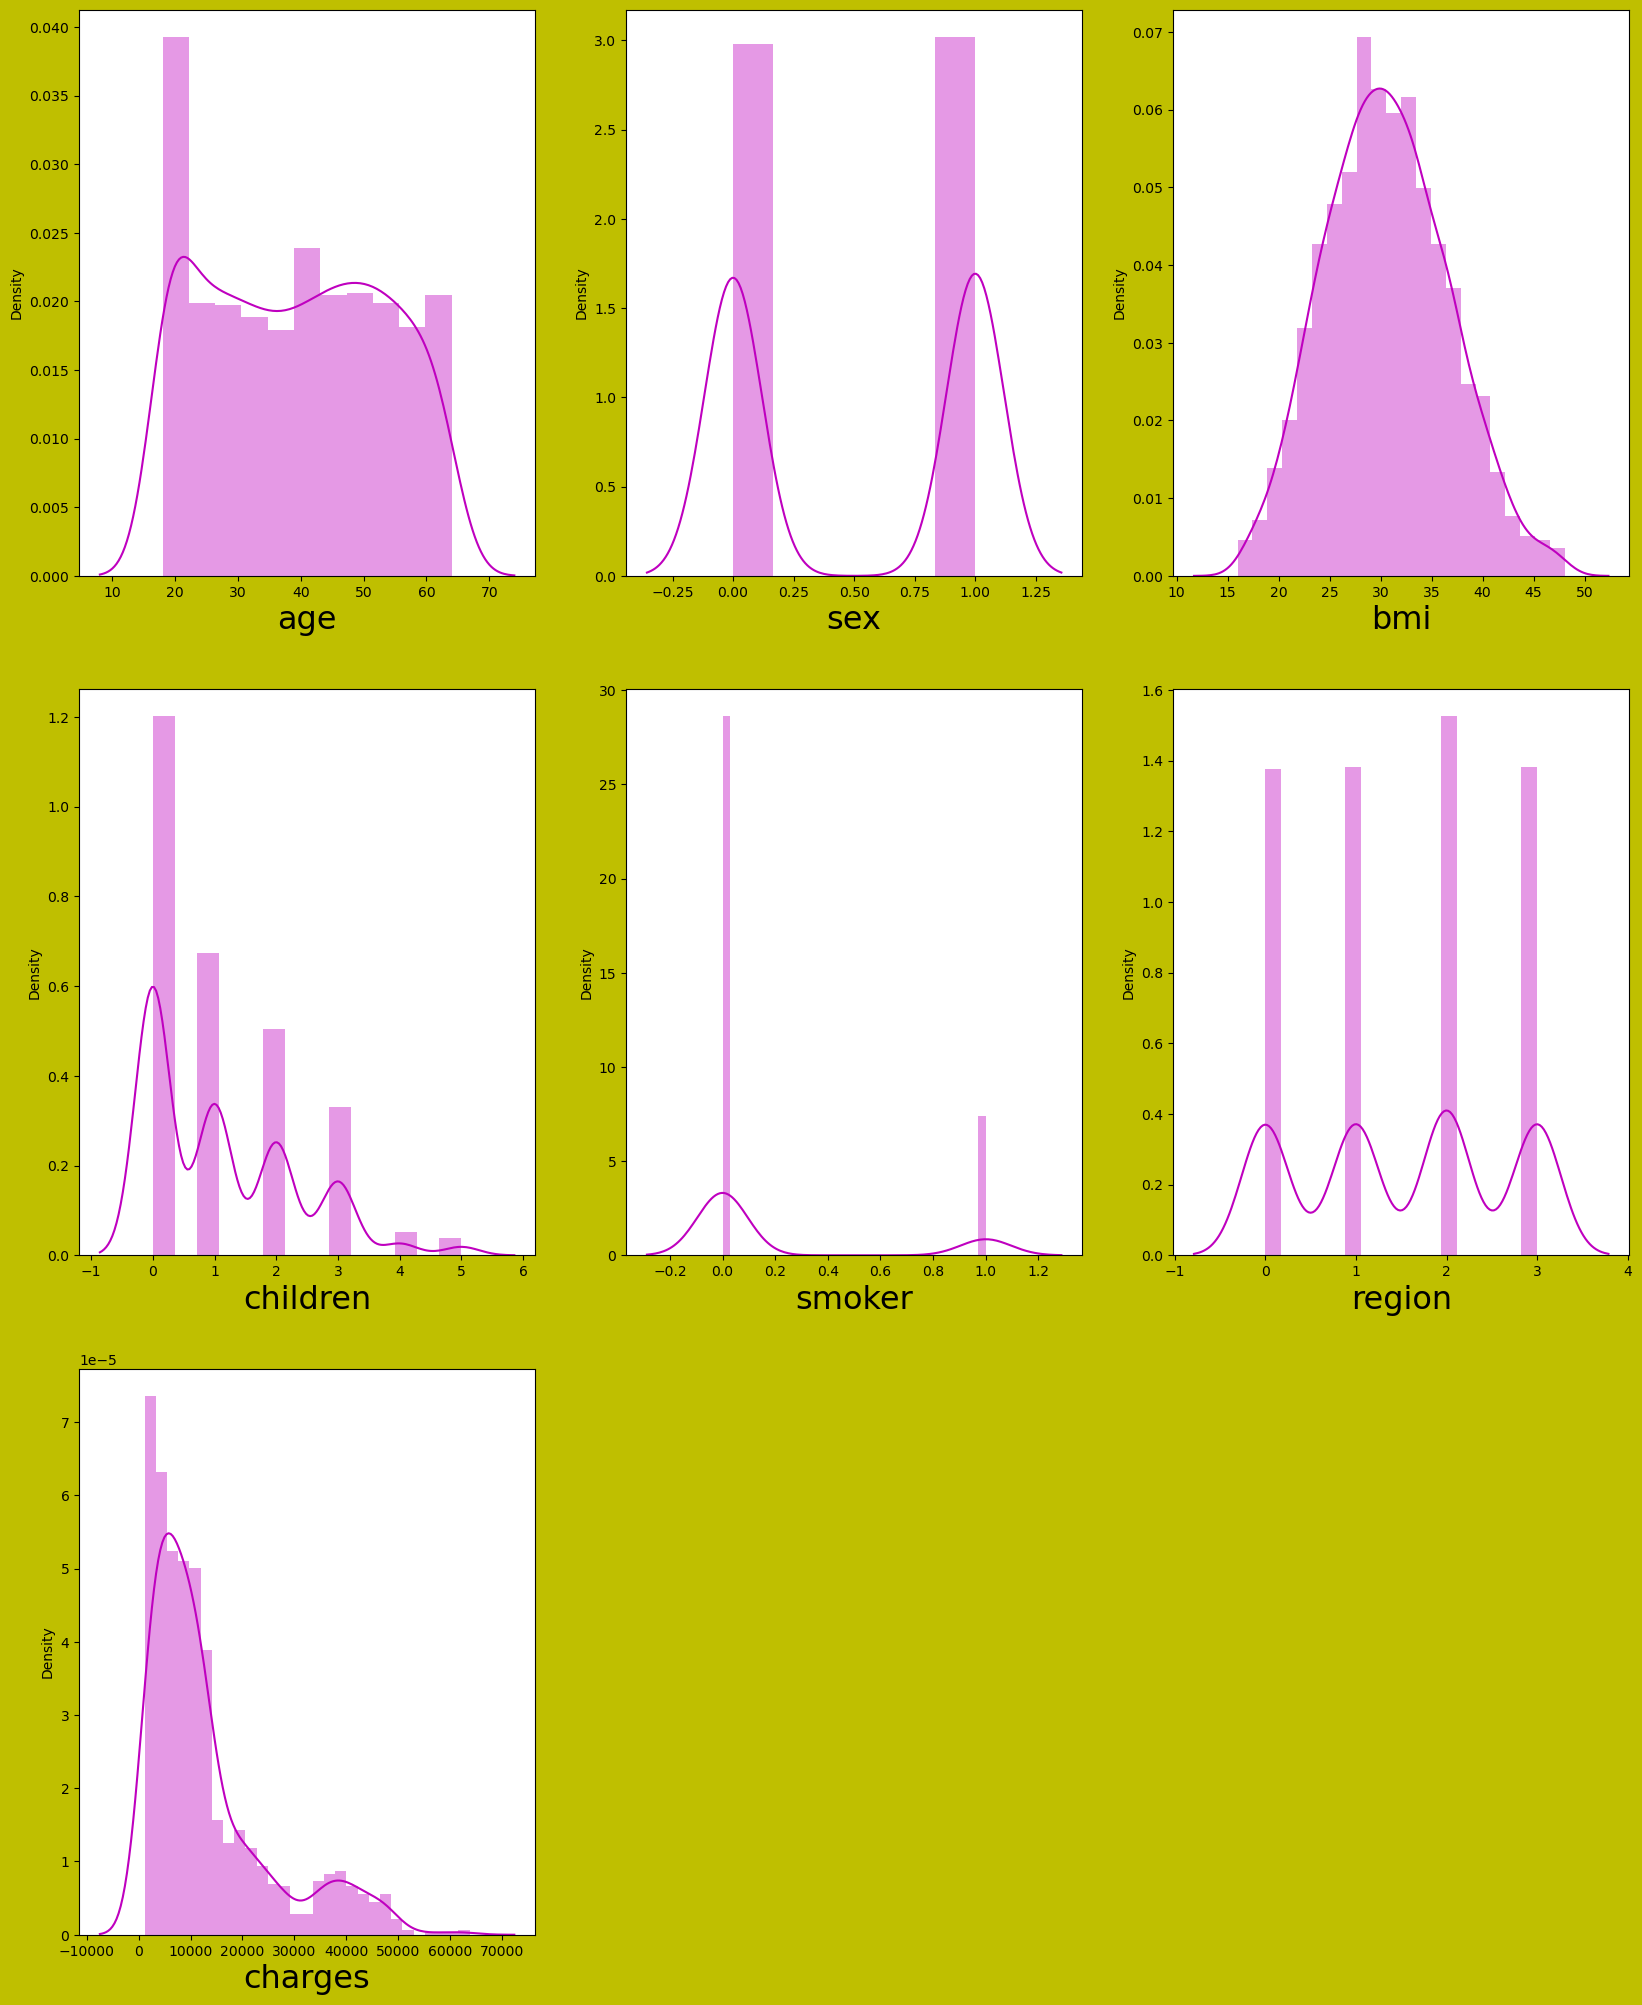

In [43]:
plt.figure (figsize=(20,25),facecolor='y')
plt.no=1
for i in df:
    if plt.no<=7:
        plt.subplot(3,3,plt.no)
        sns.distplot(df[i],color='m')
        plt.xlabel(i,fontsize=23)
    plt.no+=1
plt.show()

Here apart from the target variable(charges) and children column all are having normally distributed data.

In [44]:
df.skew()

age         0.052917
sex        -0.013519
bmi         0.206689
children    0.934891
smoker      1.464636
region     -0.033453
charges     1.517155
dtype: float64

In [45]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.017936,0.119602,0.042291,-0.024419,0.003476,0.300637
sex,-0.017936,1.000000,0.036655,0.018734,0.076510,0.002967,0.057917
bmi,0.119602,0.036655,1.000000,0.018087,0.002466,0.155731,0.201267
children,0.042291,0.018734,0.018087,1.000000,0.007057,0.017262,0.067535
smoker,-0.024419,0.076510,0.002466,0.007057,1.000000,-0.002166,0.786518
region,0.003476,0.002967,0.155731,0.017262,-0.002166,1.000000,-0.006092
charges,0.300637,0.057917,0.201267,0.067535,0.786518,-0.006092,1.000000


In [46]:
df.corr().charges.sort_values()

region     -0.006092
sex         0.057917
children    0.067535
bmi         0.201267
age         0.300637
smoker      0.786518
charges     1.000000
Name: charges, dtype: float64

In [47]:
#Separating target variable and features
x=df.iloc[:,0:-1]
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
5,31,0,25.740,0,0,2


In [48]:
y=df.iloc[:,-1]
y.head()

0    16884.92400
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

In [49]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
xf=st.fit_transform(x)
x=pd.DataFrame(data=xf,columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.444085,-1.006775,-0.449841,-0.909020,1.970478,1.343517
1,-0.802264,0.993271,0.400117,1.577418,-0.507491,0.439475
2,-0.445696,0.993271,-1.315631,-0.909020,-0.507491,-0.464568
3,-0.517010,0.993271,-0.286515,-0.909020,-0.507491,-0.464568
4,-0.588323,-1.006775,-0.809823,-0.909020,-0.507491,0.439475
...,...,...,...,...,...,...
1328,0.766634,0.993271,0.061800,1.577418,-0.507491,-0.464568
1329,-1.515399,-1.006775,0.220126,-0.909020,-0.507491,-1.368611
1330,-1.515399,-1.006775,1.041752,-0.909020,-0.507491,0.439475
1331,-1.301458,-1.006775,-0.799823,-0.909020,-0.507491,1.343517


In [50]:
#checking Multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.017551,age
1,1.008019,sex
2,1.041664,bmi
3,1.002607,children
4,1.006484,smoker
5,1.025359,region


Here we can see there is no multi-collinearity

# Modelling

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [56]:
#Finding the best random state
max_accu=0
max_RS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>max_accu:
        max_accu=acc
        max_RS=i
print("Maximum R2 score is",max_accu,"on random state",max_RS)

Maximum R2 score is 0.8142652153072281 on random state 24


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=max_RS)

In [60]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(933, 6)
(933,)
(400, 6)
(400,)


In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [62]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print("R2 score",r2_score(y_test,lr_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,lr_pred))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,lr_pred)))

R2 score 0.8142652153072281
Mean Absolute Error 3834.7421767114406
Root Mean Squared Error 5218.559392510327


In [63]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred=dtr.predict(x_test)
print("R2 score",r2_score(y_test,dtr_pred))
print("Mean Absolute Error",mean_absolute_error(y_test,dtr_pred))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,dtr_pred)))

R2 score 0.7590691753683022
Mean Absolute Error 2812.493869025
Root Mean Squared Error 5943.608440112392


In [64]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
knr_pred=knr.predict(x_test)
print("R2 Score",r2_score(y_test,knr_pred))

R2 Score 0.8560118940415833


In [67]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
print("R2 score",r2_score(y_test,rfr_pred))

R2 score 0.8864453468090259


# Cross Validation 

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
score=cross_val_score(lr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and CV is:",(r2_score(y_test,lr_pred)-score.mean()))

[0.76191703 0.70835672 0.77561843 0.73289134 0.75589181]
0.7469350670235153
Difference between R2 score and CV is: 0.06733014828371275


In [70]:
score=cross_val_score(dtr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and CV is:",(r2_score(y_test,dtr_pred)-score.mean()))

[0.77220586 0.65325369 0.71192381 0.72029886 0.69053154]
0.7096427552642608
Difference between R2 score and CV is: 0.04942642010404141


In [71]:
score=cross_val_score(knr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and CV is:",(r2_score(y_test,knr_pred)-score.mean()))

[0.82403034 0.75618738 0.83738218 0.80203796 0.80756374]
0.8054403200112434
Difference between R2 score and CV is: 0.05057157403033985


# Hyper Parameter Tuning

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
dtr=DecisionTreeRegressor()
parameters={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'splitter':['best','random'],
           'max_depth':[0,2,5,10,12]}
grid=GridSearchCV(estimator=dtr,param_grid=parameters)
grid.fit(x,y)
print("SCORE :",grid.best_score_)
print(grid.best_params_)

SCORE : 0.842680822673439
{'criterion': 'absolute_error', 'max_depth': 5, 'splitter': 'best'}


In [74]:
dtr=DecisionTreeRegressor(criterion='absolute_error',max_depth=5,splitter='best')
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print("R2 score:",r2_score(y_test,pred))

R2 score: 0.9067494912633185


In [75]:
final_model=dtr
final_model

DecisionTreeRegressor(criterion='absolute_error', max_depth=5)

# Saving the best model

In [76]:
import joblib
joblib.dump(final_model,"Medical cost insurance.pkl")

['Medical cost insurance.pkl']

# Predicting the saved model

In [77]:
model=joblib.load("Medical cost insurance.pkl")
prediction=model.predict(x_test)
prediction

array([42760.5022  ,  6740.1922  , 11454.0215  ,  5377.4578  ,
        3189.030525, 13585.68175 , 11157.174   , 24768.6279  ,
       11454.0215  ,  2020.177   ,  6740.1922  ,  9467.5133  ,
       37742.5757  , 19515.5416  ,  7676.9235  , 40904.1995  ,
       19515.5416  , 12419.44915 ,  9467.5133  ,  9467.5133  ,
        4237.12655 ,  8605.3615  ,  4237.12655 ,  6740.1922  ,
       37701.8768  , 27037.9141  ,  7676.9235  ,  4237.12655 ,
       24768.6279  ,  3189.030525,  4237.12655 , 13585.68175 ,
        3189.030525, 13585.68175 ,  5377.4578  , 37742.5757  ,
        2020.177   , 37742.5757  , 13585.68175 ,  5377.4578  ,
        7676.9235  ,  9467.5133  ,  2020.177   ,  6740.1922  ,
        5377.4578  ,  2020.177   ,  3591.48    , 19515.5416  ,
       40904.1995  , 11454.0215  , 13585.68175 ,  9467.5133  ,
        5377.4578  , 13585.68175 ,  6740.1922  , 17942.106   ,
        9467.5133  , 42760.5022  , 46972.39665 ,  4237.12655 ,
        4237.12655 ,  4237.12655 ,  4237.12655 , 21348.

In [78]:
actual=np.array(y_test)
df=pd.DataFrame()
df['Predicted Value']=prediction
df['Original Value']=actual
df

,Predicted Value,Original Value
0,42760.502200,43813.86610
1,6740.192200,5484.46730
2,11454.021500,12032.32600
3,5377.457800,6551.75010
4,3189.030525,3206.49135
...,...,...
395,5377.457800,4746.34400
396,2020.177000,1880.48700
397,4237.126550,3171.61490
398,8605.361500,7526.70645
